# Interactively rendering weather maps from the KNMI database
*Peter Kalverla, March 2016*

In the process of analysing any kind of meteorological data, it is important to comprehend the synoptic situation, *the bigger picture*. Therefore, I often visit the KNMI database to view weathermaps, but to get to the desired map requires an unpleasant and time consuming amount of mouse clicks. Therefore, I developed a small script that is able to automatically find the correct weather map given a date and time, and to visualize it immediately in the Jupyter notebook.

##### Note! 
*Unfortunately, the widgets are not visible when the notebook is viewed outside ipython. As far as I know, this is currently not possible. If anyone knows how to do it, please let me know.*

## Accessing and displaying the weather maps
Every weather map is stored in the KNMI database with a standard format, e.g.:
http://cdn.knmi.nl/knmi/map/page/klimatologie/daggegevens/weerkaarten/analyse_2012052812.gif.
There are several ways to load such a figure in the notebook, the most simple solution is





In [1]:
# Required package
from IPython.display import Image

weblink = 'http://cdn.knmi.nl/knmi/map/page/klimatologie/daggegevens/weerkaarten/analyse_2012052812.gif'
Image(url=weblink)

That's a good start. The next step is to automatically generate the correct url, given any date and time.

In [2]:
# Required package
from datetime import datetime, timedelta

def find_weathermap(timestamp):
    ''' Given a datetime object, find the url corresponding to the closest operation analysis map on the KNMI database'''
    # First, find the time corresponding to the nearest operational analysis
    nearest_6hour = round((timestamp.hour+timestamp.minute/60.)/6)*6 # yields either 0, 6, 12, 18 or 24(!)
    nearest_analysis = datetime(timestamp.year,timestamp.month,timestamp.day) + timedelta(hours=nearest_6hour)
    print 'The nearest operational analysis time is',nearest_analysis
    # Then, convert the datetime object to a string
    timestring = nearest_analysis.strftime('%Y%m%d%H')
    print 'As a string, this looks like', timestring
    # Finally, embed the string in the url
    url = 'http://cdn.knmi.nl/knmi/map/page/klimatologie/daggegevens/weerkaarten/analyse_'+timestring+'.gif'  
    print 'The corresponding map:',url
    return url

# Demonstration
x = datetime.now()
weblink = find_weathermap(x)

The nearest operational analysis time is 2016-03-19 18:00:00
As a string, this looks like 2016031918
The corresponding map: http://cdn.knmi.nl/knmi/map/page/klimatologie/daggegevens/weerkaarten/analyse_2016031918.gif


This result can be plotted, but only if the current 'nearest weather map' is already there.

## Adding interactivity
This demonstrates how weathermaps can be viewed interactively with the help of widgets. First, I will let the user choose some dates. Then, I will use a slider to visualize weather maps in a 'loop'.

In [4]:
# Required package
from IPython.display import Image, display
from IPython.html.widgets import interact,fixed
from datetime import datetime, timedelta

# We use the function as above, but without the print statements
def find_weathermap(timestamp):
    ''' Given a datetime object, find the url corresponding to the closest operation analysis map on the KNMI database'''
    # First, find the time corresponding to the nearest operational analysis
    nearest_6hour = round((timestamp.hour+timestamp.minute/60.)/6)*6 # yields either 0, 6, 12, 18 or 24(!)
    nearest_analysis = datetime(timestamp.year,timestamp.month,timestamp.day) + timedelta(hours=nearest_6hour)
    # Then, convert the datetime object to a string
    timestring = nearest_analysis.strftime('%Y%m%d%H')
    # Finally, embed the string in the url
    url = 'http://cdn.knmi.nl/knmi/map/page/klimatologie/daggegevens/weerkaarten/analyse_'+timestring+'.gif'  
    return url

# Then, a function to show the weather maps interactively:
def view_map(year=2010,month=1,day=1,hour=0,minute=0):
    ''' View weather maps from KNMI database for a given date and time '''
    # First the input needs to be converted to a datetime object
    hour = int(hour) # because I will use a float text box below
    timestamp = datetime(year,month,day,hour,minute)
    # Then, find the corresponding url
    weblink = find_weathermap(timestamp)
    # Finally, visualise the map
    a = Image(url=weblink) # somehow, using Image() directly
    display(a)             # does not work inside a function
    return

interact(view_map,
         year = ({'2010':2010,'2011':2011,'2012':2012}),
         month = ({'January':1,'February':2,'March':3,'April':4}),
         day = (0,31),
         hour = ('0'),
         minute = fixed(0))

<function __main__.view_map>

This script is not fool-proof yet. For example, it will give errors for 31st of February. Also, I have not included all months in the dropdown menu, etc. This is just intended as a matter of demonstration. In most cases, the datetime object will be part of my (time series) data, and interaction won't be necessary. This is just to check that it works.

The best tutorial for widgets that I could find:
http://nbviewer.jupyter.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb

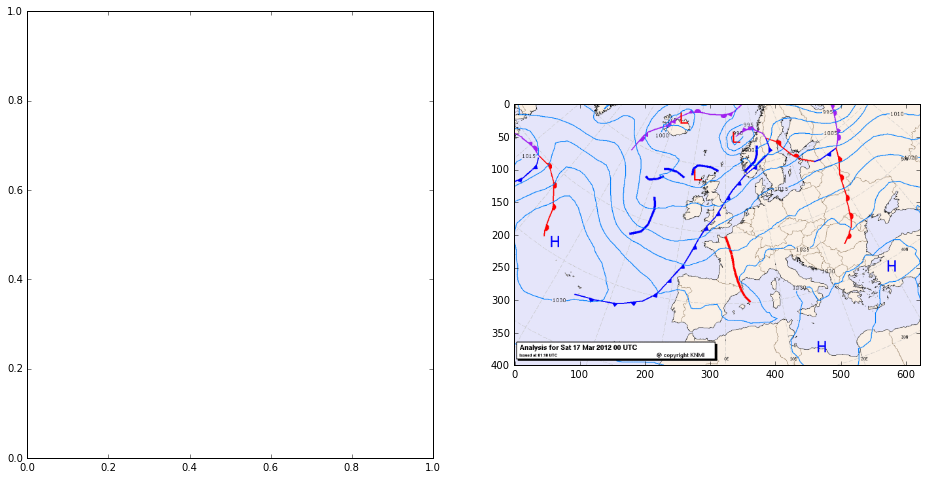

In [1]:
# To embed the weather map in a matplotlib subplot:
import io
from PIL import Image
from urllib2 import urlopen

url = 'http://cdn.knmi.nl/knmi/map/page/klimatologie/daggegevens/weerkaarten/analyse_2012031700.gif'

image_bytes = urlopen(url).read()
# internal data file
data_stream = io.BytesIO(image_bytes)
# open as a PIL image object
pil_image = Image.open(data_stream)

import matplotlib.pyplot as plt
%matplotlib inline
f,ax = plt.subplots(1,2,figsize=(16,8))
ax[1].imshow(pil_image)